In [ ]:
'''
AutoML using PyCaret - Classification and Regression Projects
'''

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *
from pycaret.regression import *
from sklearn.metrics import confusion_matrix


In [3]:
# HR dataset was taken from: https://www.kaggle.com/datasets/kadirduran/hr-dataset
df=pd.read_csv(r"hr_data.csv")
df.head()

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
0,0.38,0.53,2.0,157,3.0,0.0,1,0,sales,low,31
1,0.80,0.86,5.0,262,6.0,0.0,1,0,sales,medium,71
2,0.11,0.88,7.0,272,4.0,0.0,1,0,sales,medium,8
3,0.72,0.87,5.0,223,5.0,0.0,1,0,sales,low,68
4,0.37,0.52,2.0,159,3.0,0.0,1,0,sales,low,48


In [20]:
df.dtypes
df.select_dtypes(exclude="object")
df.describe()

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Management
count,15004.000000,15004.000000,14999.000000,15004.000000,14999.000000,15000.000000,15004.000000,15004.000000,15004.000000
mean,0.612737,0.716067,3.803054,201.042789,3.498233,0.144600,0.238336,0.021261,11.718475
std,0.248653,0.171181,1.232592,49.945217,1.460136,0.351709,0.426080,0.144258,25.314381
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,100.000000


In [22]:
df.isna().sum()
df.dropna(axis=0)


,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
0,0.38,0.53,2.0,157,3.0,0.0,1,0,sales,low,31
1,0.80,0.86,5.0,262,6.0,0.0,1,0,sales,medium,71
2,0.11,0.88,7.0,272,4.0,0.0,1,0,sales,medium,8
3,0.72,0.87,5.0,223,5.0,0.0,1,0,sales,low,68
4,0.37,0.52,2.0,159,3.0,0.0,1,0,sales,low,48
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151,3.0,0.0,1,0,support,low,49
14995,0.37,0.48,2.0,160,3.0,0.0,1,0,support,low,3
14996,0.37,0.53,2.0,143,3.0,0.0,1,0,support,low,5
14997,0.11,0.96,6.0,280,4.0,0.0,1,0,support,low,78


<Axes: >

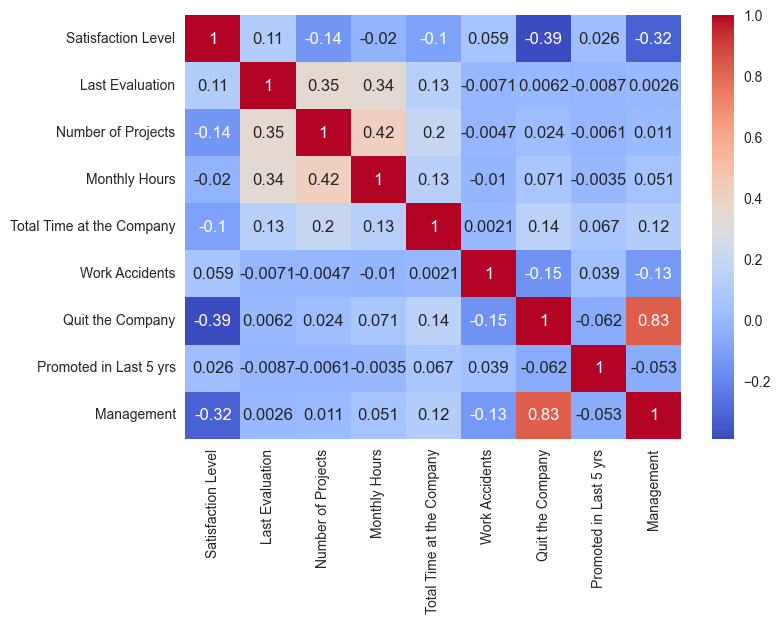

In [23]:
df_numeric=df.select_dtypes(include='number')
sns.heatmap(df_numeric.corr(), annot=True,cmap="coolwarm")

In [24]:
df["Quit the Company"].value_counts()

Quit the Company
0    11428
1     3576
Name: count, dtype: int64

<Axes: xlabel='salary', ylabel='Satisfaction Level'>

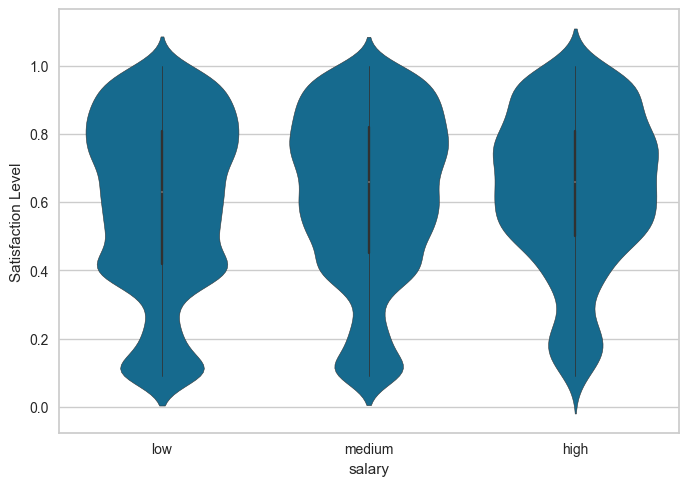

In [25]:
sns.violinplot(y=df["Satisfaction Level"],x=df["salary"])

In [37]:
for col in df.columns:
    if df[col].dtypes=="object":
        print(col,df[col].unique())

    

Departments  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary ['low' 'medium' 'high']


In [28]:
setup(df,train_size=0.7,target='Quit the Company',normalize=True,session_id=123,ignore_features="Management")

,Description,Value
0,Session id,123
1,Target,Quit the Company
2,Target type,Binary
3,Original data shape,"(15004, 11)"
4,Transformed data shape,"(15004, 21)"
5,Transformed train set shape,"(10502, 21)"
6,Transformed test set shape,"(4502, 21)"
7,Ignore features,10
8,Numeric features,7
9,Categorical features,2


In [29]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9881,0.9911,0.9585,0.9913,0.9746,0.9668,0.9671,0.2240
xgboost,Extreme Gradient Boosting,0.9852,0.9921,0.9581,0.9797,0.9687,0.9590,0.9592,0.0880
lightgbm,Light Gradient Boosting Machine,0.9849,0.9934,0.9489,0.9872,0.9676,0.9577,0.9581,0.8220
et,Extra Trees Classifier,0.9840,0.9908,0.9505,0.9820,0.9658,0.9554,0.9557,0.2160
catboost,CatBoost Classifier,0.9830,0.9925,0.9445,0.9835,0.9635,0.9524,0.9528,0.8450
gbc,Gradient Boosting Classifier,0.9765,0.9891,0.9313,0.9689,0.9496,0.9343,0.9347,0.2810
dt,Decision Tree Classifier,0.9749,0.9699,0.9605,0.9361,0.9480,0.9314,0.9317,0.0650
ada,Ada Boost Classifier,0.9584,0.9830,0.9085,0.9167,0.9123,0.8851,0.8853,0.1360
knn,K Neighbors Classifier,0.9408,0.9663,0.8877,0.8673,0.8773,0.8382,0.8385,0.1150
qda,Quadratic Discriminant Analysis,0.8656,0.9132,0.8202,0.6870,0.7452,0.6554,0.6623,0.0430


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [30]:
model=create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9848,0.9860,0.9442,0.9916,0.9673,0.9574,0.9579
1,0.9819,0.9941,0.9442,0.9793,0.9615,0.9497,0.9499
2,0.9924,0.9959,0.9760,0.9919,0.9839,0.9789,0.9789
3,0.9876,0.9876,0.9600,0.9877,0.9736,0.9655,0.9657
4,0.9848,0.9925,0.9400,0.9958,0.9671,0.9572,0.9578
5,0.9924,0.9933,0.9680,1.0000,0.9837,0.9788,0.9790
6,0.9876,0.9897,0.9640,0.9837,0.9737,0.9656,0.9657
7,0.9924,0.9908,0.9720,0.9959,0.9838,0.9788,0.9789
8,0.9895,0.9891,0.9640,0.9918,0.9777,0.9708,0.9710


In [38]:
t_model=tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9715,0.9753,0.9004,0.9784,0.9378,0.9193,0.9206
1,0.9715,0.9834,0.9283,0.9510,0.9395,0.9208,0.9210
2,0.9810,0.9878,0.9440,0.9752,0.9593,0.9469,0.9471
3,0.9733,0.9796,0.9160,0.9703,0.9424,0.9251,0.9257
4,0.9743,0.9781,0.9040,0.9869,0.9436,0.9270,0.9285
5,0.9800,0.9815,0.9360,0.9791,0.9571,0.9440,0.9444
6,0.9733,0.9752,0.9200,0.9664,0.9426,0.9253,0.9257
7,0.9724,0.9732,0.9040,0.9784,0.9397,0.9218,0.9230
8,0.9714,0.9737,0.9320,0.9472,0.9395,0.9208,0.9209


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


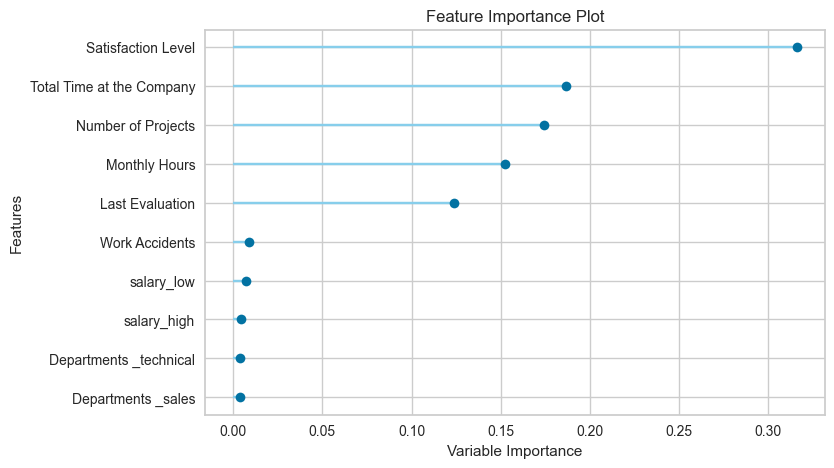

In [39]:
plot_model(t_model,"feature")

In [50]:
df_coff=pd.DataFrame(zip(t_model.feature_names_in_,t_model.feature_importances_),columns=["Features","Coefficent"])
df_coff.sort_values(by='Coefficent', ascending=False)

,Features,Coefficent
0,Satisfaction Level,0.315909
4,Total Time at the Company,0.186489
2,Number of Projects,0.174441
3,Monthly Hours,0.152284
1,Last Evaluation,0.123980
5,Work Accidents,0.008799
18,salary_low,0.006974
19,salary_high,0.004504
11,Departments _technical,0.003809
9,Departments _sales,0.003716


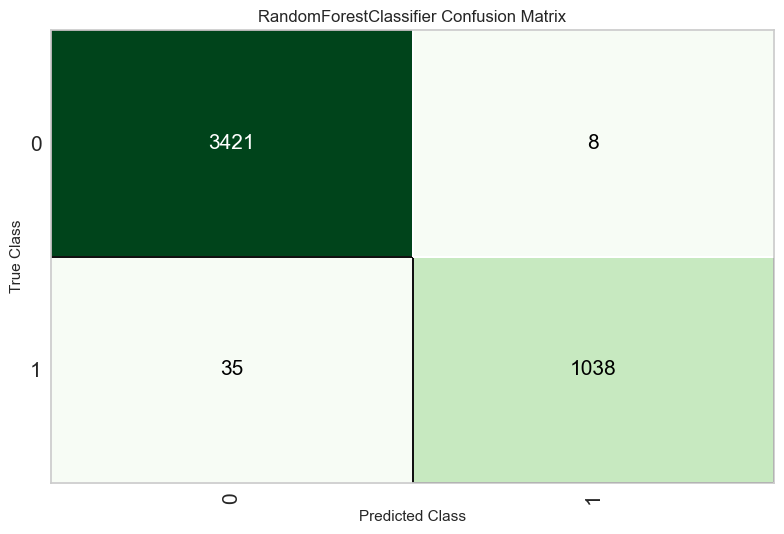

In [51]:
plot_model(t_model,"confusion_matrix")

In [52]:
final_df=predict_model(t_model)
final_df

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9904,0.9931,0.9674,0.9924,0.9797,0.9735,0.9736


,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Promoted in Last 5 yrs,Departments,salary,Quit the Company,prediction_label,prediction_score
1679,0.43,0.55,2.0,159,3.0,0.0,0,RandD,low,1,1,0.97
4665,0.63,0.93,3.0,236,4.0,0.0,0,sales,high,0,0,1.00
1076,0.09,0.79,6.0,276,4.0,0.0,0,sales,medium,1,1,1.00
1253,0.85,1.00,4.0,234,5.0,0.0,0,hr,low,1,1,0.99
2570,0.80,0.96,3.0,257,5.0,0.0,0,support,medium,0,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
8931,0.92,0.56,3.0,174,3.0,0.0,0,sales,medium,0,0,1.00
9127,0.76,0.60,5.0,244,3.0,1.0,0,technical,low,0,0,1.00
10498,0.98,0.56,5.0,188,3.0,0.0,0,technical,low,0,0,1.00
14592,0.38,0.46,2.0,145,3.0,0.0,0,hr,medium,1,1,1.00


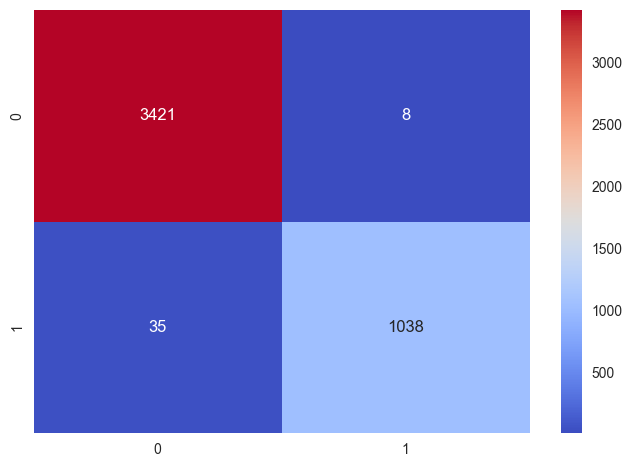

In [53]:
cm = confusion_matrix(final_df["Quit the Company"], final_df["prediction_label"])
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.show()

In [54]:
save_model(t_model,"model_classification")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Satisfaction Level',
                                              'Last Evaluation',
                                              'Number of Projects',
                                              'Monthly Hours',
                                              'Total Time at the Company',
                                              'Work Accidents',
                                              'Promoted in Last 5 yrs'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               mis

# AutoML Regression Project using PyCaret

In [98]:
# Vehicle dataset was taken from: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
df=pd.read_csv(r"car_data.csv")
df.head()
df.dtypes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


<Axes: >

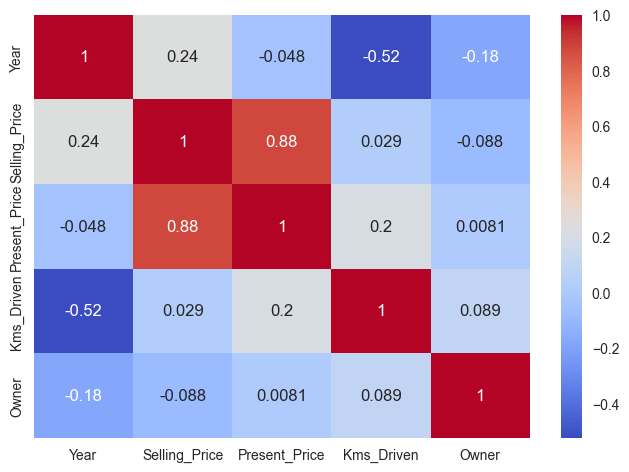

In [77]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')

In [69]:
df.select_dtypes(exclude='object').corr()["Selling_Price"].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878983
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

<Axes: ylabel='Selling_Price'>

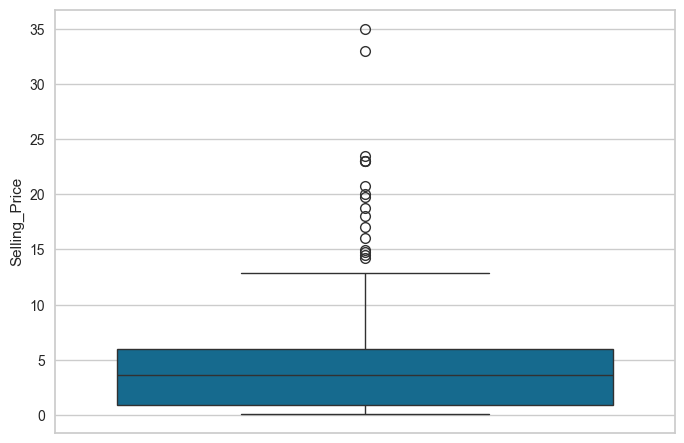

In [72]:
sns.boxplot(df["Selling_Price"])

In [99]:
df=df.drop('Car_Name',axis=1)
for col in df.columns:
    if df[col].dtypes=="object":
        print(col, df[col].unique())
        dummies=pd.get_dummies(df[col], prefix=col,dtype=int)
        df=pd.concat([df,dummies], axis=1)
        df.drop(col, axis=1, inplace=True)

Fuel_Type ['Petrol' 'Diesel' 'CNG']
Seller_Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']


In [109]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


In [101]:
setup(df,train_size=0.7,target='Selling_Price',session_id=123)

,Description,Value
0,Session id,123
1,Target,Selling_Price
2,Target type,Regression
3,Original data shape,"(301, 12)"
4,Transformed data shape,"(301, 12)"
5,Transformed train set shape,"(210, 12)"
6,Transformed test set shape,"(91, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [102]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7060,3.1383,1.4540,0.8965,0.1529,0.2051,0.0380
et,Extra Trees Regressor,0.7202,3.5512,1.5686,0.8944,0.1642,0.1759,0.0640
catboost,CatBoost Regressor,0.7164,4.0898,1.5723,0.8917,0.1561,0.2293,0.2610
gbr,Gradient Boosting Regressor,0.7440,4.0509,1.5697,0.8760,0.1624,0.2107,0.0290
rf,Random Forest Regressor,0.7697,3.7577,1.6283,0.8431,0.1598,0.1956,0.1140
br,Bayesian Ridge,1.1844,4.5088,1.9543,0.8415,0.3291,1.1041,0.0230
ridge,Ridge Regression,1.2016,4.4593,1.9543,0.8399,0.3308,1.1323,0.0130
lar,Least Angle Regression,1.1720,4.9663,1.9778,0.8396,0.3238,1.0821,0.0140
lr,Linear Regression,1.2083,4.4559,1.9566,0.8390,0.3319,1.1421,1.0260
ada,AdaBoost Regressor,1.1183,4.4901,1.9072,0.8178,0.2844,0.6911,0.0320


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, objective='reg:squarederror', ...)

In [103]:
model=create_model("xgboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6000,1.0440,1.0218,0.9586,0.1438,0.1506
1,1.0985,5.2153,2.2837,0.5837,0.3325,0.4399
2,0.7444,1.3667,1.1690,0.9517,0.1379,0.3416
3,0.7154,1.1933,1.0924,0.9620,0.1634,0.1974
4,0.3726,0.2523,0.5023,0.9923,0.0849,0.0940
5,0.3878,0.3572,0.5977,0.9655,0.1222,0.1954
6,1.1293,15.3586,3.9190,0.7551,0.1667,0.0928
7,0.3616,0.2944,0.5426,0.9654,0.0963,0.1865
8,0.9052,4.8249,2.1966,0.9023,0.1322,0.1907


In [104]:
t_model=tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8448,2.2596,1.5032,0.9104,0.1961,0.3177
1,1.0671,4.2583,2.0636,0.6601,0.2815,0.3885
2,1.0785,3.2696,1.8082,0.8846,0.1719,0.3682
3,0.8938,2.3978,1.5485,0.9237,0.2652,0.4349
4,0.4510,0.3905,0.6249,0.9880,0.1058,0.1204
5,0.5898,0.8364,0.9146,0.9193,0.2080,0.3480
6,1.4103,24.3096,4.9305,0.6123,0.2348,0.2518
7,0.5709,0.6736,0.8207,0.9208,0.1493,0.3257
8,1.2292,5.9086,2.4308,0.8804,0.2139,0.3547


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [105]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

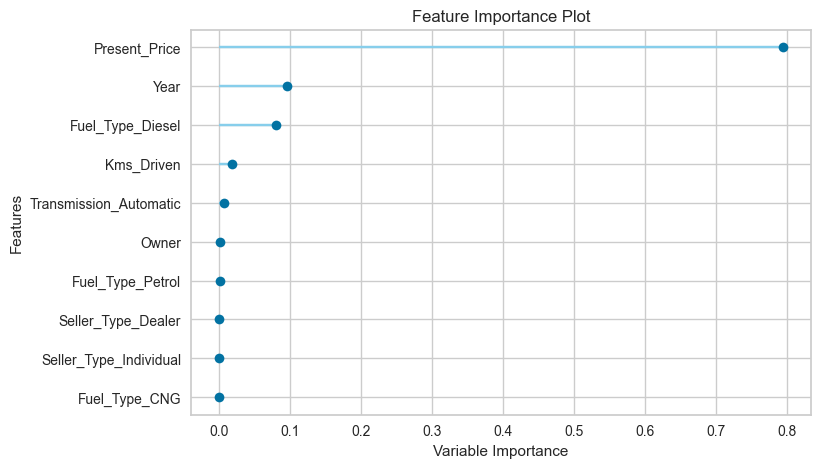

In [110]:
plot_model(model,"feature")

In [111]:
final_df=predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.4391,0.4679,0.6840,0.9732,0.1014,0.1505


In [112]:
save_model(t_model,"model_Regression")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Year', 'Present_Price',
                                              'Kms_Driven', 'Owner',
                                              'Fuel_Type_CNG',
                                              'Fuel_Type_Diesel',
                                              'Fuel_Type_Petrol',
                                              'Seller_Type_Dealer',
                                              'Seller_Type_Individual',
                                              'Transmission_Automatic',
                                              'Transmission_Manual'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=...
                               importance_type=None,
                               interaction_c

In [117]:
df_coff=pd.DataFrame(zip(model.feature_names_in_,model.feature_importances_),columns=["Features","Coefficent"])
df_coff.sort_values(by="Coefficent", ascending=False)

,Features,Coefficent
1,Present_Price,0.794388
0,Year,0.096507
5,Fuel_Type_Diesel,0.080259
2,Kms_Driven,0.018068
9,Transmission_Automatic,0.006960
3,Owner,0.001893
6,Fuel_Type_Petrol,0.001572
7,Seller_Type_Dealer,0.000353
4,Fuel_Type_CNG,0.000000
8,Seller_Type_Individual,0.000000
